<a href="https://colab.research.google.com/github/a-forty-two/diamler_17_jan/blob/main/04_cv_image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

lovedeathrobots.jpeg  sample_data


In [2]:
rawdatabinary = open('lovedeathrobots.jpeg', 'rb').read()
rawdatatext = open('lovedeathrobots.jpeg', 'rt').read()

UnicodeDecodeError: ignored

In [3]:
# all files-> encoding -> otherwise raw data can be manipulated by any tool
# encoding-> helps with better/compressed representation of data
# encode-> optimized the bytes behind the scene 
# a tool is then programmed to decode the file encoding
# Word-> .docx -> word knows how to decode .doc and .docx encoding!
# Photoshop -> .psd-> PS knows how to decode .psd encoding!

In [ ]:
# UTF-8 > unified true font where 1 char = 8 bits (C/C++ style characters char)
# UTF-16 -> UTF where 1 char = 16 bits = 2 bytes (C/C++ style wide character wchar)
# UTF-32, XMLNS (html)
# .mkv, .avi -> not supported in WMP, while supported in VLC or MKV player! 

In [4]:
# 12 13 13 14 14 14 2 2 2 6 6 6 55 55 55 55 55 22 (unencoded)
# run length encoding (data compression)
# duplication-> count 
# 12 1 13 2 14 3 2 3 63 55 4 22 1 (encoded)
# this helped reduce the size of data 
# in order to process-> i need a tool or program that could read alternate 
# chars, and understand that it means LENGTH!



In [5]:
rawdatabinary[:10]
# all hexademical, incomprehensive 

b'\xff\xd8\xff\xe0\x00\x10JFIF'

In [6]:
# images-> openCV -> all decoders and manipulators for image processing 

In [7]:
import cv2 
myimg = cv2.imread('lovedeathrobots.jpeg')
myimg[:10]
# BGR -> in python 
# RGB-> real life-> stack-> r is at bottom, blue in middle, red on top

array([[[45, 41, 36],
        [45, 41, 36],
        [45, 41, 36],
        ...,
        [19, 14, 11],
        [19, 14, 11],
        [19, 14, 11]],

       [[45, 41, 36],
        [45, 41, 36],
        [45, 41, 36],
        ...,
        [19, 14, 11],
        [19, 14, 11],
        [19, 14, 11]],

       [[45, 41, 36],
        [45, 41, 36],
        [45, 41, 36],
        ...,
        [19, 14, 11],
        [19, 14, 11],
        [19, 14, 11]],

       ...,

       [[44, 40, 35],
        [44, 40, 35],
        [44, 40, 35],
        ...,
        [19, 14, 11],
        [19, 14, 11],
        [19, 14, 11]],

       [[43, 39, 34],
        [43, 39, 34],
        [43, 39, 34],
        ...,
        [19, 14, 11],
        [19, 14, 11],
        [19, 14, 11]],

       [[43, 39, 34],
        [43, 39, 34],
        [43, 39, 34],
        ...,
        [20, 15, 12],
        [20, 15, 12],
        [20, 15, 12]]], dtype=uint8)

(640, 2000, 3)


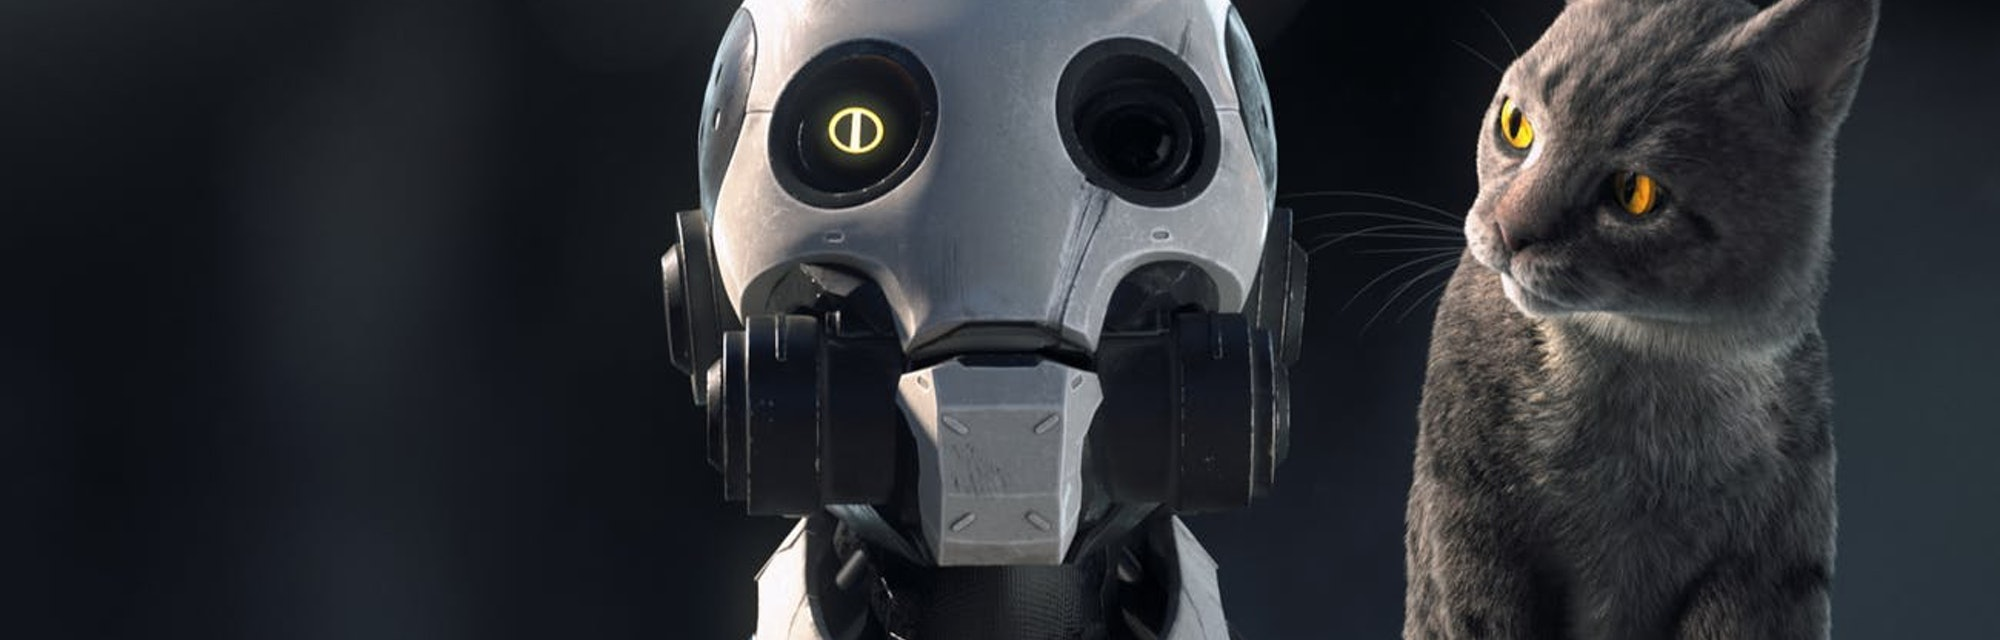

In [10]:
from google.colab.patches import cv2_imshow
print(myimg.shape)
cv2_imshow(myimg)
# 640 rows
# each row contains 2000 pixels
# each pixel contains 3 values- B, G and R

(320, 1000, 3)


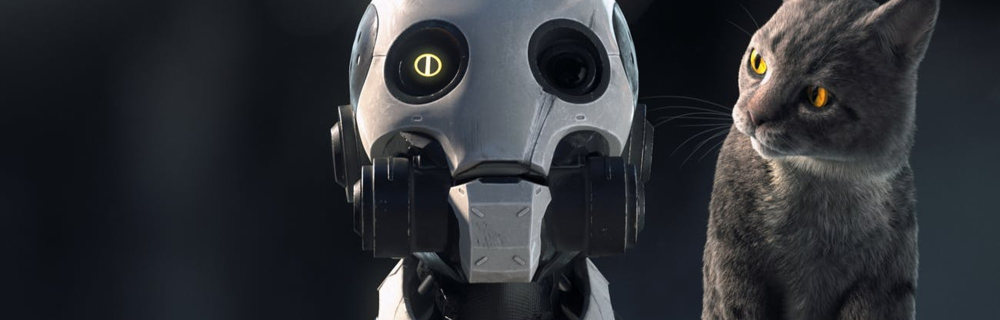

In [14]:
# always mantain aspect ratios else the height and width will be disturbed/ img can be distorted
imgh, imgw, pxcount = myimg.shape 
reduction_ratio = 0.5
newh = int(imgh * reduction_ratio)
neww = int(imgw * reduction_ratio)
smallimg = cv2.resize(myimg, (neww, newh))
print(smallimg.shape)
cv2_imshow(smallimg)

In [15]:
# VECTORS-> scalar values with direction
# scalar-> 3
# vector-> [1 2 3 4 5 6 7]
# if you multiple or divide a vector with a scalar -> DIRECTION DOES NOT CHANGE!
# such vectors following this rule-> EIGENVECTORS 
# the scalar value representing this vector-> eigenvector 
# MATRICES-> matrix -> image vector, a set of vectors traveling together 
# Eigner vector-> scalar value * MATRIX => result's DIRECTIONS SHOULD NOT CHANGE!
# some examples of non eigen distortions-> sin theta, cos theta 
# ANGULAR values, RADIAN values change the direction of the vector => DISTORTION!


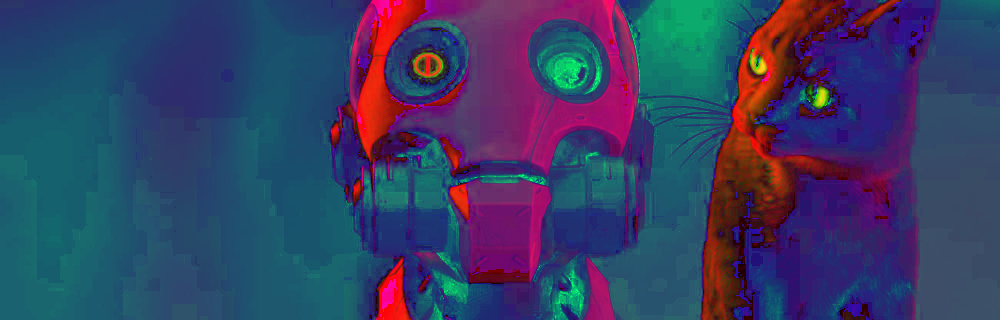

In [16]:
img2 = cv2.cvtColor(smallimg, cv2.COLOR_BGR2HSV)
cv2_imshow(img2)

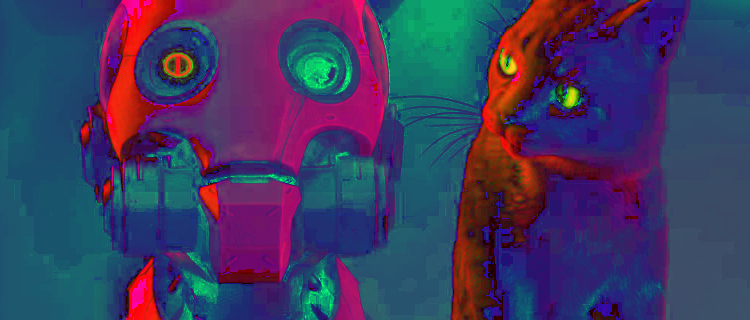

In [18]:
h,w,p = img2.shape
w_extractionbegin = int(w/4)
img3 = img2[:, w_extractionbegin: ]
cv2_imshow(img3)

In [21]:
h,w,p = img3.shape
robot_w_till = int(w*0.60)  
img_r = img3[:, :robot_w_till]
img_c = img3[:, robot_w_till:]

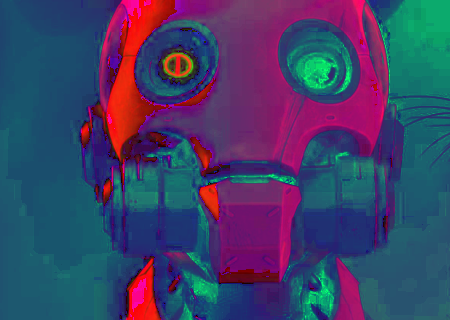

In [22]:
cv2_imshow(img_r)

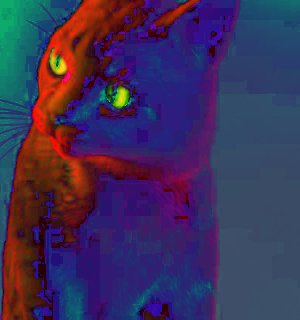

In [23]:
cv2_imshow(img_c)